In [19]:
import lmfit
from kid_readout.analysis import inverse, resonator, plot_resonator, khalil

In [2]:
A = 1e-3
p = inverse.parameters(i=100e-6, c=50e-6, c_imag=5e-6, A=A, a=0, delay=-60, phi=np.pi/2)
scale = 3
f = np.linspace(p['f_r'].value - 0.01 * scale, p['f_r'].value + 0.01 * scale, 100 * scale)
s21 = inverse.model(p, f)
sigma = A * 5e-3
noise = sigma * (np.random.randn(f.size) + 1j * np.random.randn(f.size))

In [3]:
r = resonator.Resonator(f, s21 + noise, errors=(sigma + 1j * sigma) * np.ones(f.size),
                        model=inverse.model, guess=inverse.guess, functions=inverse.functions)

rd = resonator.Resonator(f, s21 + noise, errors=(sigma + 1j * sigma) * np.ones(f.size))

In [4]:
lmfit.report_fit(r.result.params)

[[Variables]]
    A:        0.00099979 +/- 5.64e-07 (0.06%) (init= 0.0009877154)
    a:        0.00100968 +/- 0.001554 (153.93%) (init= 0)
    c:        4.9946e-05 +/- 2.48e-07 (0.50%) (init= 2.680277e-05)
    c_imag:   8.4528e-07 +/- 1.26e-07 (14.94%) (init= 0)
    delay:   -59.9955303 +/- 0.004380 (0.01%) (init=-60.94096)
    f_phi:    99.97 (fixed)
    f_r:      100.000022 +/- 3.49e-06 (0.00%) (init= 100.0007)
    i:        9.9343e-05 +/- 5.23e-07 (0.53%) (init= 5.346423e-05)
    phi:      2.82858069 +/- 0.000908 (0.03%) (init= 2.752969)
[[Correlations]] (unreported correlations are <  0.100)
    C(delay, phi)                =  0.910 
    C(A, c)                      =  0.811 
    C(c, i)                      =  0.805 
    C(c, delay)                  =  0.748 
    C(a, c_imag)                 =  0.726 
    C(c, phi)                    =  0.682 
    C(A, i)                      =  0.659 
    C(A, delay)                  =  0.606 
    C(A, phi)                    =  0.553 
    C(dela

In [5]:
lmfit.report_fit(rd.result.params)

[[Variables]]
    A_mag:      0.00099979 +/- 5.64e-07 (0.06%) (init= 0.0009877154)
    A_phase:    0 (fixed)
    Q:          6697.65577 +/- 33.06262 (0.49%) (init= 50000)
    Q_e_imag:  -356.886470 +/- 66.07899 (18.52%) (init= 0)
    Q_e_real:   20013.2585 +/- 99.43799 (0.50%) (init= 40000)
    delay:     -59.9954986 +/- 0.004376 (0.01%) (init=-60.94096)
    f_0:        100.000001 +/- 2.62e-05 (0.00%) (init= 100.0007)
    f_phi:      99.97 (fixed)
    phi:        2.82870780 +/- 0.000938 (0.03%) (init= 2.752969)
[[Correlations]] (unreported correlations are <  0.100)
    C(Q, Q_e_real)               =  0.907 
    C(delay, phi)                =  0.878 
    C(Q_e_imag, f_0)             =  0.854 
    C(A_mag, delay)              =  0.606 
    C(A_mag, phi)                =  0.532 


In [6]:
r.result.redchi

1.064623030821654

In [7]:
rd.result.redchi

1.0624381496588262

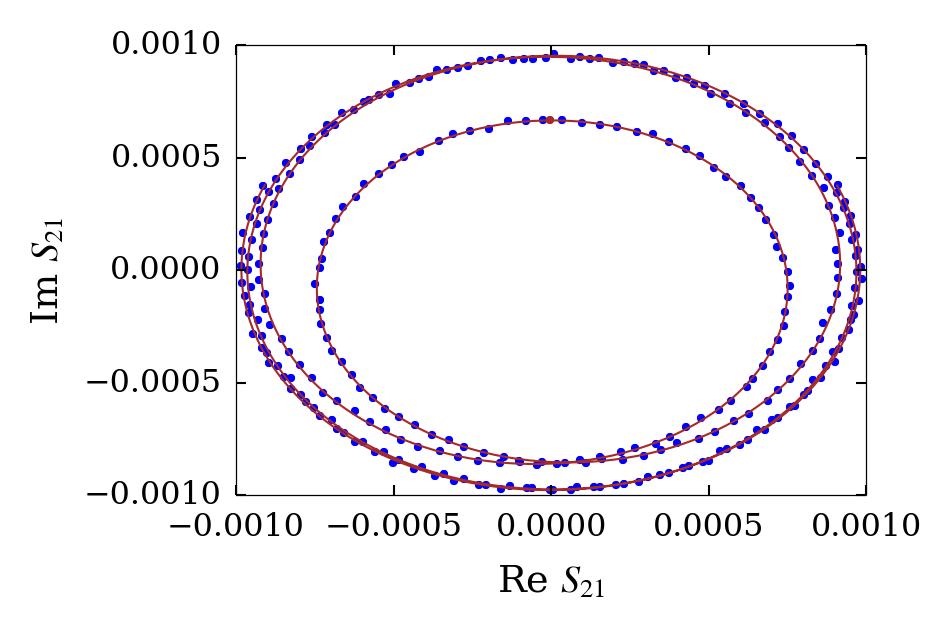

In [8]:
fig = plot_resonator.IQ_circle(r)

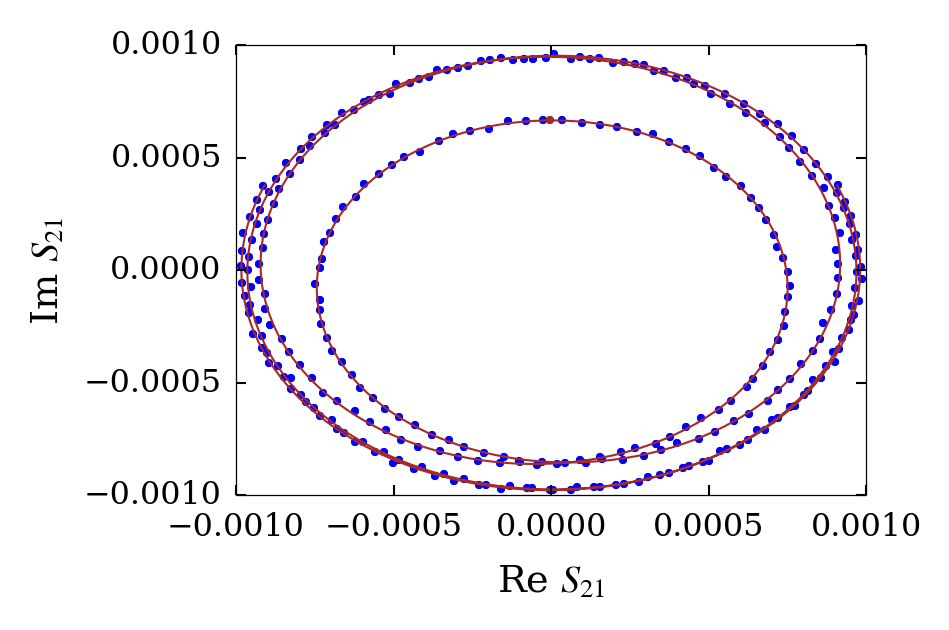

In [9]:
fig = plot_resonator.IQ_circle(rd)

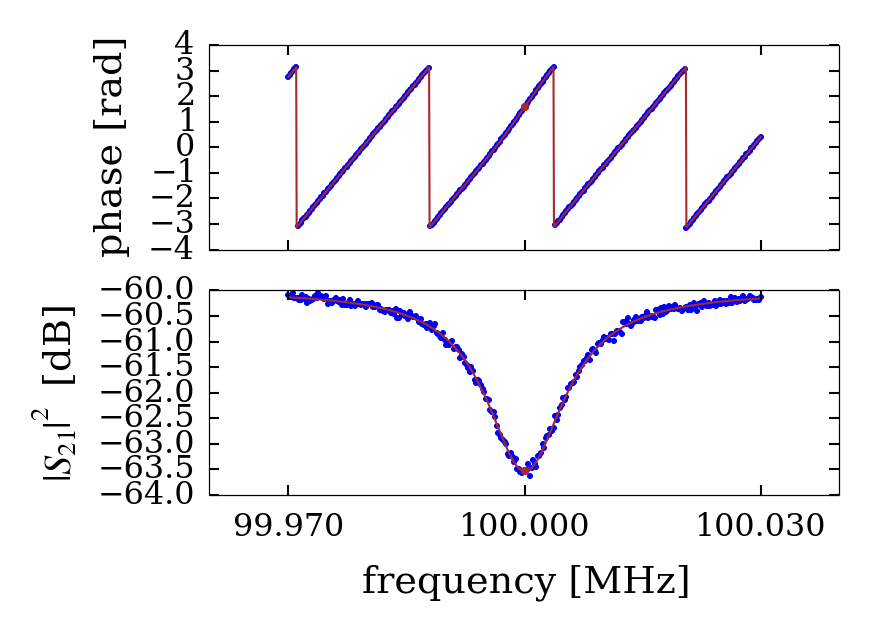

In [10]:
fig = plot_resonator.amplitude_and_phase(r)

In [11]:
r.f_r / rd.f_0

1.0000002042935341

In [12]:
r.i / (1 / rd.Q_i)

0.99987644711839907

In [13]:
r.c / np.real(1 / rd.Q_e)

0.99989532776620282

In [14]:
r.c_imag / np.imag(1 / rd.Q_e)

0.94894779608287116

In [15]:
r.result.params['f_r'].stderr / r.f_r

3.4921308730483991e-08

In [16]:
r.result.params['i'].stderr

5.2287966749590004e-07

In [17]:
r.result.params['c'].stderr

2.4824500027089674e-07

In [18]:
r.result.params['c_imag'].stderr

1.2626549229400626e-07

In [24]:
dQi = khalil.qi_error(rd.Q, rd.result.params['Q'].stderr,
                rd.Q_e_real, rd.result.params['Q_e_real'].stderr,
                rd.Q_e_imag, rd.result.params['Q_e_imag'].stderr)
dQi

78.846543947312284

In [25]:
rd.Q_i

10064.920761113286

In [26]:
1 / rd.Q_i

9.9354979908395174e-05

In [27]:
dQi / rd.Q_i**2

7.7832672265023466e-07

In [28]:
r.i

9.9342704314326084e-05

In [29]:
r.result.params['i'].stderr

5.2287966749590004e-07